In [ ]:
#!pip install gradio

In [2]:
from fastai.vision.all import *
import gradio as gr

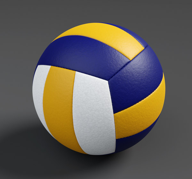

In [3]:
im =  PILImage.create('volleyball.jpg') #dah ada dlm folder
im.thumbnail((192,192))
im

In [7]:
learn = load_learner('model.pkl')

In [8]:
learn.predict(im)

('False', TensorBase(0), TensorBase([0.5978, 0.4022]))

In [9]:
categories = ('dog', 'cat')
def classify_image (img):
  pred,idx,probs = learn.predict(img) # function classify image(predict, index, probability cat/dog)
  return dict(zip(categories, map(float,probs)))
  # gradio x handle tensors, so kena map jadi float

In [10]:
# test function tu
classify_image(im)

{'dog': 0.5977680087089539, 'cat': 0.402231901884079}

In [12]:
# create gradio interface
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg','cat.jpg','dunno.jpg']

intf = gr.Interface(fn = classify_image, inputs = image, outputs = label, examples = examples)
intf.launch(inline = False)
# url in local computer, not yet in production

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1c09bcb4f40>, 'http://127.0.0.1:7860/', None)